# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Introduction and Project Objective
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this project, our goal is to implement a classifier model to identify spam and non-spam (ham) messages. We use textual data containing messages labeled as "ham" or "spam." The Naive Bayes model, which you learned about in this chapter, will be used for this task.
# </font>
# </p>

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Importing Required Libraries
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, we import the necessary libraries for the project.
# </font>
# </p>

In [2]:
# Import essential libraries for data manipulation, text processing, and visualization
import pandas as pd  # For data handling and DataFrame operations
import numpy as np   # For numerical computations
import re            # For regular expressions in text preprocessing
import string        # For string operations (e.g., punctuation)
from collections import defaultdict, Counter  # For word counting and data structures
import matplotlib.pyplot as plt  # For plotting visualizations
import seaborn as sns  # For enhanced visualizations (e.g., heatmaps)
import math  # For logarithmic calculations in Naive Bayes

# Set random seed for reproducibility
np.random.seed(42)
# Note: Setting a random seed ensures consistent results for operations involving randomness

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Loading Data
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the data is loaded from a CSV file, and only the required columns are selected and renamed.
# </font>
# </p>

In [3]:
# Load the spam dataset from a CSV file with 'latin-1' encoding to handle special characters
df = pd.read_csv('../Data/spam.csv', encoding='latin-1')
# Select only the relevant columns ('v1' for labels, 'v2' for text) and rename them
df = df[['v1', 'v2']]
df.columns = ['label', 'text']
# Note: The dataset is assumed to be in '../Data/spam.csv'. Ensure the file exists in the correct path.

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Displaying the First 5 Rows of Data
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# Using this code, the first 5 rows of the data are displayed to verify correct loading.
# </font>
# </p>

In [4]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()
# Note: This helps confirm that the dataset has been loaded correctly and shows the structure of the 'label' and 'text' columns.

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Encoding Labels
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the 'ham' and 'spam' labels are converted to numerical values 0 and 1 to make them suitable for modeling.
# </font>
# </p>

In [5]:
# Convert 'ham' and 'spam' labels to numerical values (ham: 0, spam: 1) using a mapping
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# Display the first 5 rows to verify the label encoding
df.head()
# Note: The mapping ensures that 'ham' is encoded as 0 and 'spam' as 1, making the labels compatible with the Naive Bayes model.

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Text Preprocessing Functions
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the extracted text is converted to lowercase, numbers and punctuation are removed, and the text is split into individual words.
# </font>
# </p>

In [6]:
# Define a function to preprocess text for Naive Bayes modeling
def preprocess_text(text: str):
    # Convert text to lowercase to ensure consistency
    text = text.lower()
    # Remove numbers, punctuation, and special characters, keeping only letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    # Normalize whitespace by replacing multiple spaces with a single space and stripping leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Split the text into tokens (words) and return as a list
    return text.split()

# Apply the preprocessing function to the 'text' column and store results in a new column
df['processed_text'] = df['text'].apply(preprocess_text)
# Display the first 5 rows to verify preprocessing
df.head()
# Note: The preprocessing steps simplify the text for modeling by removing irrelevant characters and standardizing the format.
# Note: Unlike the previous project, this preprocessing function correctly assigns the lowercase result.

,label,text,processed_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Splitting Data into Training and Testing Sets
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the data is split into training (80% of the data) and testing (20% of the data) sets.
# </font>
# </p>

In [7]:
# Calculate the size of the training set (80% of the data)
train_size = int(0.8 * len(df))
# Split the data into training and testing sets
train_data = df[:train_size]
test_data = df[train_size:]
# Note: This is a simple split based on index order. For better randomization, consider using sklearn's train_test_split.

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Implementing the Naive Bayes Model
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this exercise, you need to implement the Naive Bayes model to predict labels. The goal is to train the model based on the training data to learn class and word probabilities and then predict the classes for new data.
# </font>
# </p>
# 
# ---
# 
# <h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# Exercise Steps
# </h3>
# 
# <ul dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <li>In the <code>train</code> function, calculate the probabilities of classes and the probability of word occurrences in each class using word counts and conditional probability formulas.</li>
# <li>In the <code>predict</code> function, use the new data and the probabilities calculated during training to predict the class for each sample.</li>
# <li>Use Laplace smoothing to avoid issues caused by zero probabilities.</li>
# </ul>


In [8]:
# Define a Naive Bayes classifier for text classification
class NaiveBayes:
    def __init__(self):
        """
        Initialize the model with variables to store class probabilities, 
        word counts per class, and the vocabulary.
        """
        # Initialize data structures for storing word counts, totals, class probabilities, and vocabulary
        self.class_word_counts = defaultdict(Counter)  # Stores word counts for each class (ham or spam)
        self.class_totals = defaultdict(int)           # Total word count for each class
        self.class_probs = defaultdict(float)          # Prior probabilities of each class
        self.vocab = set()                             # Vocabulary of all unique words in the training data
        # Note: Using defaultdict simplifies handling missing keys during training and prediction.

    def train(self, X, y):
        """
        Train the Naive Bayes model using the training data.

        Parameters:
        X: List of sentences/documents (tokenized)
        y: List of corresponding class labels

        Steps:
        1. Count the number of samples for each class.
        2. Calculate the prior probabilities for each class.
        3. Count the occurrences of each word in each class.
        4. Update the vocabulary with all words seen in the training data.
        """
        # Count the number of samples per class (ham or spam)
        class_counts = Counter(y)
        total_samples = len(y)
        
        # Calculate prior probabilities for each class (P(class))
        for cls, count in class_counts.items():
            self.class_probs[cls] = count / total_samples

        # Count word occurrences for each class and build vocabulary
        for text, cls in zip(X, y):
            for word in text:
                self.class_word_counts[cls][word] += 1  # Increment word count for the class
                self.class_totals[cls] += 1             # Increment total word count for the class
                self.vocab.add(word)                    # Add word to vocabulary
        # Note: The vocabulary is used for Laplace smoothing during prediction to account for unseen words.

    def predict(self, X):
        """
        Predict the class labels for a list of input samples.

        Parameters:
        X: List of tokenized documents 
        
        Returns:
        List of predicted class labels for each sample in X.
        """
        predictions = []
        vocab_size = len(self.vocab)

        # Iterate over each test document
        for text in X:
            class_scores = {}
            
            # Calculate the log-probability for each class
            for cls in self.class_probs:
                # Start with the log of the prior probability (P(class))
                score = math.log(self.class_probs[cls])
                
                # Add log-probability of each word given the class (P(word|class))
                for word in text:
                    # Apply Laplace smoothing: (count(word, class) + 1) / (total_words_in_class + vocab_size)
                    word_count = self.class_word_counts[cls][word] + 1
                    total = self.class_totals[cls] + vocab_size
                    score += math.log(word_count / total)
                
                class_scores[cls] = score

            # Select the class with the highest score
            best_class = max(class_scores, key=class_scores.get)
            predictions.append(best_class)

        return predictions
        # Note: Logarithms are used to prevent underflow from multiplying small probabilities.
        # Note: Laplace smoothing ensures non-zero probabilities for unseen words.

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Training the Naive Bayes Model
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the Naive Bayes model is trained using the training data (`X_train`, `y_train`).
# </font>
# </p>

In [9]:
# Prepare training and testing data
X_train = train_data['processed_text']  # Tokenized text from training set
y_train = train_data['label']          # Encoded labels from training set
X_test = test_data['processed_text']   # Tokenized text from test set
y_test = test_data['label']            # Encoded labels from test set

# Initialize and train the Naive Bayes model
nb_model = NaiveBayes()
nb_model.train(X_train, y_train)
# Note: The model learns class probabilities and word probabilities from the training data.

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Predicting Labels for the Test Set
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the trained Naive Bayes model is used to predict labels for the test set. The variable `X_test` contains the test text data, which is fed to the model to predict whether each message is spam or not. The output is a list of predictions stored in `y_pred`.
# </font>
# </p>

In [10]:
# Predict labels for the test set using the trained Naive Bayes model
y_pred = nb_model.predict(X_test)
y_pred
# Note: The predictions are numerical (0 for ham, 1 for spam) based on the earlier label encoding.

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Evaluating the Model Using Precision, Recall, F1, and Accuracy Metrics
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the model's performance is evaluated using various metrics, including Precision, Recall, F1 Score, and overall Accuracy.
# </font>
# </p>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# To do this, calculate the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Then use the appropriate formulas to compute the evaluation metrics.
# </font>
# </p>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# Guidelines:
# </font>
# </p>
# 
# <ul dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
#     <li>Use comparisons between actual values (<code>y_true</code>) and predicted values (<code>y_pred</code>) to calculate <code>TP</code>, <code>TN</code>, <code>FP</code>, and <code>FN</code>.</li>
#     <li>If the denominator is zero, set the metric value to zero to avoid division-by-zero errors.</li>
# </ul>

In [11]:
# Define a function to evaluate the model's performance
def evaluate(y_true, y_pred):
    # Calculate True Positives (TP): Correctly predicted spam
    tp = np.sum((y_true == 1) & (y_pred == 1))
    # Calculate True Negatives (TN): Correctly predicted ham
    tn = np.sum((y_true == 0) & (y_pred == 0))
    # Calculate False Positives (FP): Ham incorrectly predicted as spam
    fp = np.sum((y_true == 0) & (y_pred == 1))
    # Calculate False Negatives (FN): Spam incorrectly predicted as ham
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # Calculate Precision: TP / (TP + FP), handle division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    # Calculate Recall: TP / (TP + FN), handle division by zero
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    # Calculate F1 Score: 2 * (Precision * Recall) / (Precision + Recall), handle division by zero
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # Calculate Accuracy: (TP + TN) / (TP + TN + FP + FN)
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    
    return precision, recall, f1, accuracy

# Convert test labels and predictions to numpy arrays for evaluation
y_test_np = y_test.values
y_pred_np = np.array(y_pred)

# Evaluate the model and print metrics
precision, recall, f1, accuracy = evaluate(y_test_np, y_pred_np)

print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))
print("Accuracy:", round(accuracy, 2))
# Note: The evaluation function handles division-by-zero cases by returning 0 for the metric.
# Note: The metrics focus on the positive class (spam, 1), which is typical for imbalanced datasets like spam detection.

Precision: 0.84
Recall: 0.94
F1 Score: 0.89
Accuracy: 0.97


# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Displaying the Confusion Matrix
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the Confusion Matrix is plotted to evaluate the model's performance. The matrix displays four key values that indicate how well the model performs on this task.
# </font>
# </p>

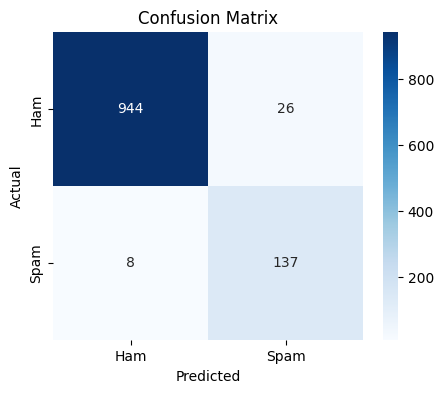

In [12]:
# Import confusion_matrix from sklearn for visualization
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test_np, y_pred_np)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Note: The confusion matrix shows TP, TN, FP, and FN, helping visualize classification performance.
# Note: The 'Blues' colormap and annotations make the matrix easy to interpret.

# <h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
# <font face="vazir" color="#0099cc">
# Saving Predictions to CSV
# </font>
# </h2>
# 
# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
# <font face="vazir" size=3>
# In this section, the predictions from the Naive Bayes model are saved to a CSV file for further analysis or submission.
# </font>
# </p>

In [13]:
# Create a DataFrame with test indices and predicted labels
pred_df = pd.DataFrame({'id': test_data.index, 'predicted_label': y_pred})
# Convert numerical predictions back to 'ham' and 'spam' for readability
pred_df['predicted_label'] = pred_df['predicted_label'].map({0: 'ham', 1: 'spam'})
# Save predictions to a CSV file named 'predictions.csv'
pred_df.to_csv('predictions.csv', index=False)
# Print confirmation of successful save
print("Predictions have been saved to 'predictions.csv'.")
# Note: The DataFrame includes the index of each test sample and its predicted label (ham or spam).
# Note: The CSV file is saved without an index column for cleaner output.
# Note: Ensure the working directory has write permissions to save the file successfully.

Predictions have been saved to 'predictions.csv'.
